In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qbm import QBM, Duality
from tqdm import tqdm
from IPython.display import clear_output

# matplotlib styling
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = '12'

# Separatrix

In [2]:
def deigvsN(Ni, Nf, alpha):
    out = {
        "syst": [],
        "evecs": [],
        "evals": [],
        "d_eval": []
    }
    Ns = np.arange(Ni, Nf, 2)
    for _, N_ in enumerate(Ns):
        s_ = QBM(N_, alpha)
        s_.gen_harper_states()
        out["evecs"].append(
            s_.harper_states['evecs'][N_//2-1 : N_//2+1]
        )
        out["evals"].append(
            s_.harper_states['evals'][N_//2-1 : N_//2+1]
        )
        out["d_eval"].append(np.diff(out["evals"][-1].real)[0])
        out["syst"].append(s_)
    out["Ns"] = Ns
    return out

In [3]:
aper1 = deigvsN(4, 41, 1)
per1 = deigvsN(4, 41, 0)

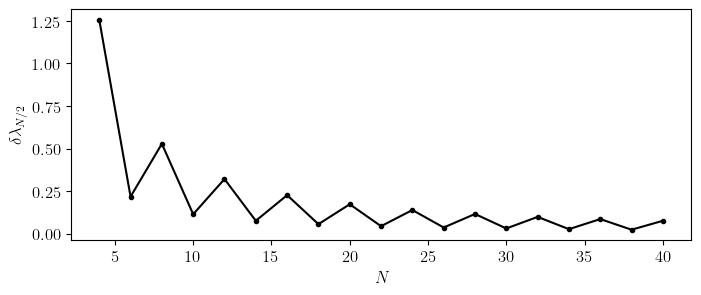

In [4]:
plt.figure(figsize=(8, 3))
plt.plot(aper1["Ns"], aper1["d_eval"], 'k.-')
plt.ylabel(r"$\delta \lambda_{N/2}$")
plt.xlabel(r"$N$")
plt.show()

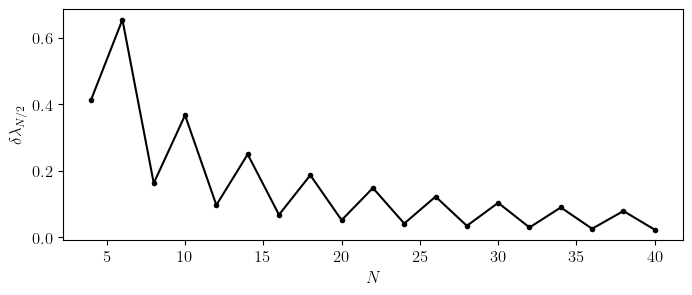

In [5]:
plt.figure(figsize=(8, 3))
plt.plot(per1["Ns"], per1["d_eval"], 'k.-')
plt.ylabel(r"$\delta \lambda_{N/2}$")
plt.xlabel(r"$N$")
plt.show()